## Bagging


Bagging (also known as Bootstrap aggregation) is one of the first and most basic ensemble techniques. It was proposed by Leo Breiman in 1994. Bagging is based on the statistical method of bootstrapping, which makes the evaluation of many statistics of complex models feasible.

The bootstrap method goes as follows. Let there be a sample $X$ of size $N$. We can make a new sample from the original sample by drawing $N$ elements from the latter randomly and uniformly, with replacement. In other words, we select a random element from the original sample of size $N$ and do this $N$ times. All elements are equally likely to be selected, thus each element is drawn with the equal probability $1/N$.

Let’s say we are drawing balls from a bag one at a time. At each step, the selected ball is put back into the bag so that the next selection is made equiprobably i.e. from the same number of balls $N$. Note that, because we put the balls back, there may be duplicates in the new sample. Let’s call this new sample $X_1$.

By repeating this procedure $M$ times, we create $M$ bootstrap samples $X_1, ..... , X_M$. In the end, we have a sufficient number of samples and can compute various statistics of the original distribution.

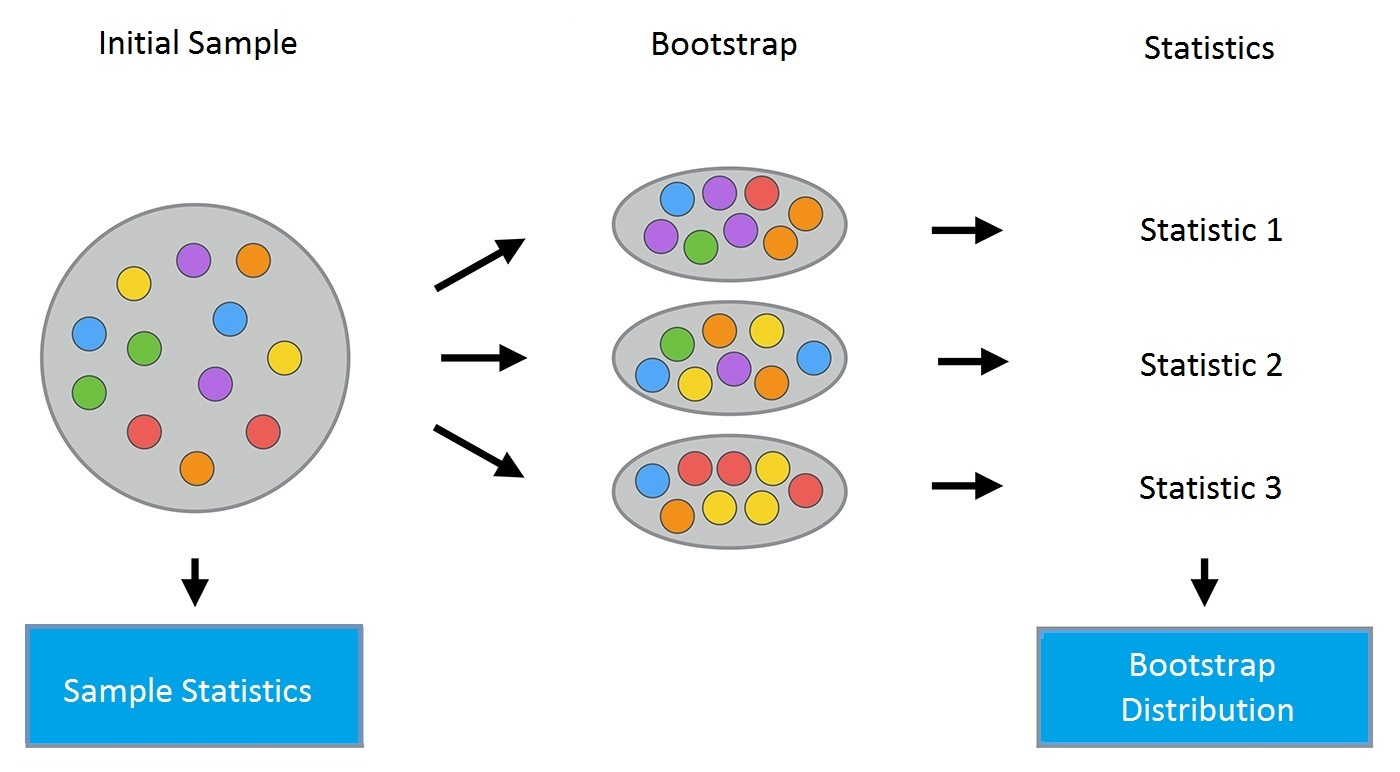

For our example, we’ll use the familiar telecom_churn dataset. Previously, when we discussed feature importance, we saw that one of the most important features in this dataset is the number of calls to customer service. Let’s visualize the data and look at the distribution of this feature.

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [3]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

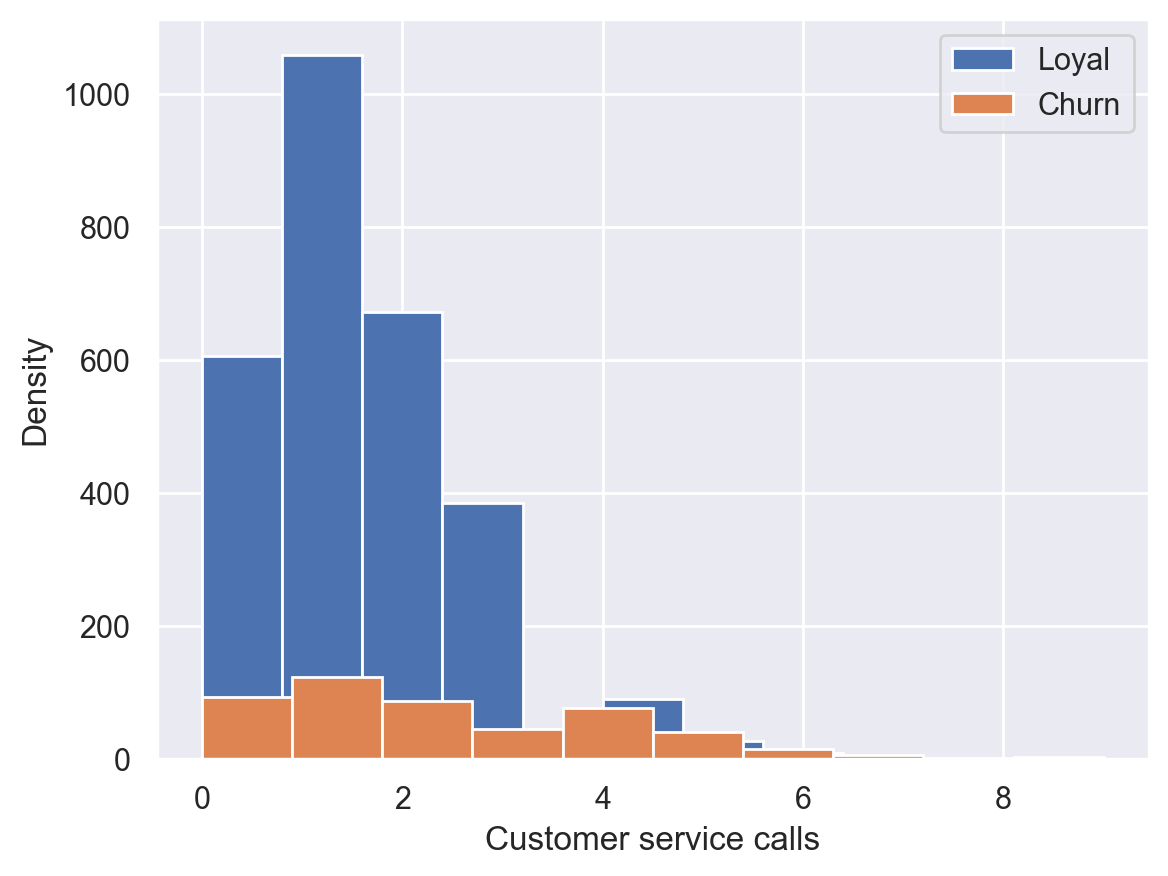

In [16]:
telecom_data = pd.read_csv(DATA_PATH + 'telecom_churn.csv')

telecom_data[telecom_data["Churn"]==False]["Customer service calls"].hist(label = "Loyal")

telecom_data[telecom_data["Churn"]==True]["Customer service calls"].hist(label = "Churn")

plt.xlabel("Customer service calls")
plt.ylabel("Density")
plt.legend()

Looks like loyal customers make fewer calls to customer service than those who eventually leave. Now, it might be a good idea to estimate the average number of customer service calls in each group. Since our dataset is small, we would not get a good estimate by simply calculating the mean of the original sample. We will be better off applying the bootstrap method. Let’s generate 1000 new bootstrap samples from our original population and produce an interval estimate of the mean.

In [17]:
def get_bootstrap_samples(data, n_samples):
    """Generate bootstrap samples from the data."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    """Compute confidence intervals for a statistic."""
    boundaries = np.percentile(stat, [100*alpha/2, 100*(1-alpha/2)])
    return boundaries

In [19]:
loyal_calls = telecom_data.loc[
    telecom_data["Churn"] == False, "Customer service calls"
].values

churn_calls = telecom_data.loc[
    telecom_data["Churn"] == True, "Customer service calls"
].values



np.random.seed(0)



loyal_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(loyal_calls, 1000)
]

churn_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(churn_calls, 1000)
]

print(
    "Service calls from loyal: mean interval", stat_intervals(loyal_mean_scores, 0.05)
)
print(
    "Service calls from churn: mean interval", stat_intervals(churn_mean_scores, 0.05)
)

Service calls from loyal: mean interval [1.4077193  1.49473684]
Service calls from churn: mean interval [2.0621118  2.39761905]


Note that the interval for the loyal customers is narrower, which is reasonable since they make fewer calls (0, 1 or 2) in comparison with the churned clients who call until they are fed up and decide to switch providers.

## Bagging in ML

Suppose that we have a training set $X$. Using bootstrapping, we generate samples $X_1 , ... , X_M$. Now, for each bootstrap sample, we train its own classifier $a_i(x)$. The final classifier will average the outputs from all these individual classifiers. In the case of classification, this technique corresponds to voting: $$\large a(x) = \frac{1}{M}\sum_{i = 1}^M a_i(x).$$

 
 
The picture below illustrates this algorithm:

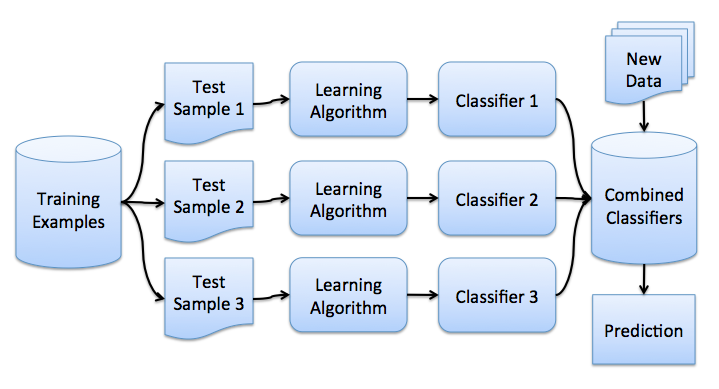